# Super store statistics

## Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, anderson, kstest, lognorm, cauchy, gamma, exponpow, chi2
import fitter
from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns

In [ ]:
data = pd.read_csv("order_detail.csv")
category = pd.read_csv("category.csv")
data['Profit'].fillna(0, inplace=True)
data = pd.merge(data, category, on='Product ID')

data['has_discount'] = (data['Discount'] > 0).astype(int)

discounted_df = data.loc[data['has_discount'] == 1, :]

all_undiscounted_df = data.loc[data['has_discount'] == 0, :]

positive_profit = discounted_df[discounted_df['Profit'] > 0]
#negative_profit = data[data['Profit']]
discounted_df.head


In [4]:
discounted_ids = discounted_df['Product ID'].tolist()

# Filter the non-discounted products in data that have a corresponding discounted product in has_discount
undiscounted_df = data.loc[(data['Product ID'].isin(discounted_ids)) & (data['has_discount'] == 0), :]

#result_df = undiscounted_df.loc[undiscounted_df['Product ID'] == 'OFF-HAR-10001948', :]
# Print the resulting dataframe
#print(result_df)

In [5]:
# use the IQR method to remove outliers
Q1 = discounted_df['Quantity'].quantile(0.25)
Q3 = discounted_df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
discounted_quantity_rslt = discounted_df[(discounted_df['Quantity'] >= Q1 - 1.5*IQR) & (discounted_df['Quantity'] <= Q3 + 1.5*IQR)]


In [6]:
# use the IQR method to remove outliers
Q1 = undiscounted_df['Quantity'].quantile(0.25)
Q3 = undiscounted_df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
undiscounted_quantity_rslt = undiscounted_df[(undiscounted_df['Quantity'] >= Q1 - 1.5*IQR) & (undiscounted_df['Quantity'] <= Q3 + 1.5*IQR)]


In [7]:
# use the IQR method to remove outliers
Q1 = discounted_df['Profit'].quantile(0.25)
Q3 = discounted_df['Profit'].quantile(0.75)
IQR = Q3 - Q1
discounted_profit_rslt = discounted_df[(discounted_df['Profit'] >= Q1 - 1.5*IQR) & (discounted_df['Profit'] <= Q3 + 1.5*IQR)]


In [8]:
# use the IQR method to remove outliers
Q1 = undiscounted_df['Profit'].quantile(0.25)
Q3 = undiscounted_df['Profit'].quantile(0.75)
IQR = Q3 - Q1
undiscounted_profit_rslt = undiscounted_df[(undiscounted_df['Profit'] >= Q1 - 1.5*IQR) & (undiscounted_df['Profit'] <= Q3 + 1.5*IQR)]


In [9]:
# use the IQR method to remove outliers
Q1 = positive_profit['Profit'].quantile(0.25)
Q3 = positive_profit['Profit'].quantile(0.75)
IQR = Q3 - Q1
positive_profit_rslt = positive_profit[(positive_profit['Profit'] >= Q1 - 1.5*IQR) & (positive_profit['Profit'] <= Q3 + 1.5*IQR)]


['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform']


Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.27it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,5.696271e-07,3033.598177,-190635.205736,inf,0.265062,0.000000e+00
expon,5.980002e-07,10632.034984,-190238.895945,inf,0.226726,0.000000e+00
lognorm,1.036613e-06,3013.799011,-185744.735896,inf,0.027471,8.877852e-06
chi2,3.596101e-06,3418.230980,-175603.289475,inf,0.205036,4.936421e-301
exponpow,3.716603e-06,4244.900732,-175334.567356,inf,0.240242,0.000000e+00


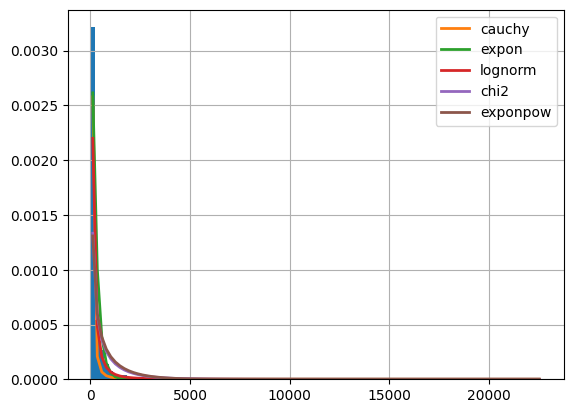

In [45]:
#apc = rslt_df["Quantity"].values
apc = discounted_df.groupby('Product ID')['Sales'].mean()
dist = get_common_distributions()
print(dist)
f = Fitter(apc, distributions= dist)
f.fit()
f.summary()


In [82]:
norm.fit(undiscounted_df.groupby('Product ID')['Quantity'].mean())

(3.4866586027241664, 1.5959597698526242)

In [83]:
loc, scale = 3.4866586027241664, 1.5959597698526242
x = range(0, 14)  # Replace with your desired range
pdf = stats.cauchy.pdf(x, loc=loc, scale=scale)

In [81]:
shape, loc, scale = 0.3611003370773027, -1.2086594534525958, 4.419059726543821
x = range(0, 14)  # Replace with your desired range
pdf = stats.lognorm.pdf(x, s=shape, loc=loc, scale=scale)

In [84]:
df = pd.DataFrame({'x': x, 'pdf': pdf})
df.to_csv('chi22_pdf.csv', index=False)

In [77]:
undiscounted_quantity_rslt.to_csv('undiscounted_table.csv', index=False)

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 27.10it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,6.425056,1008.93604,-48960.493563,inf,0.270785,0.0


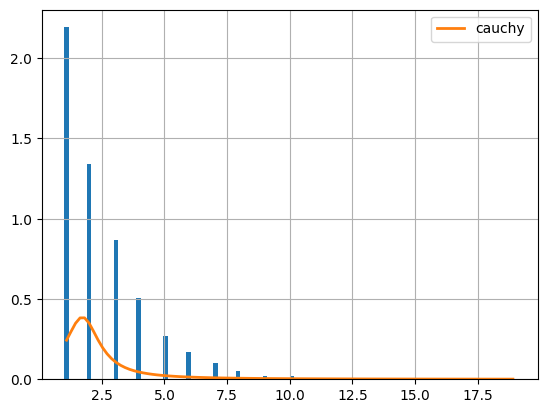

In [22]:

apc = discounted_profit_rslt.groupby('Product ID')['Profit'].mean()

f = Fitter(apc,
           distributions=['cauchy'])
f.fit()
f.summary()


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.001109,1109.95351,-90409.19572,0.036033,0.070287,1.519067e-25


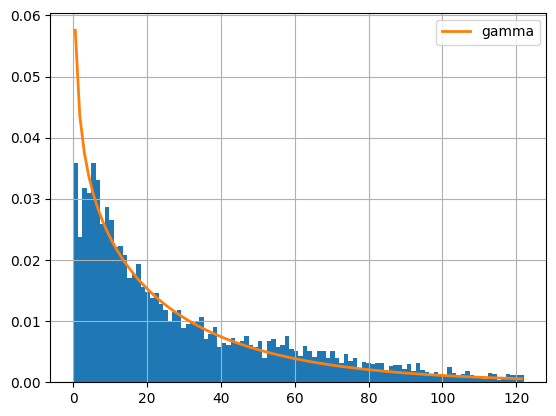

In [55]:
apc = undiscounted_profit_rslt.groupby('Product ID')['Profit'].mean()

f = Fitter(apc,
           distributions=['gamma'])
f.fit()
f.summary()


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,7.860716,546.649332,-56216.334550,inf,0.080967,1.134086e-46
chi2,7.866528,540.992272,-56210.343722,inf,0.089267,1.179634e-56


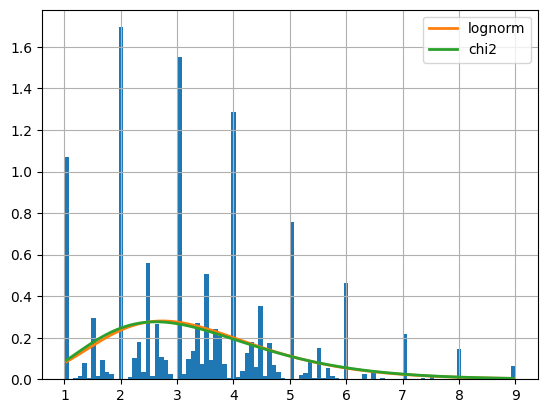

In [49]:

apc = discounted_quantity_rslt.groupby('Product ID')['Quantity'].mean()

f = Fitter(apc,
           distributions=['lognorm',
                          'chi2',])
f.fit()
f.summary()


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,5.446252,567.393695,-46136.948699,inf,0.072312,4.575461e-30


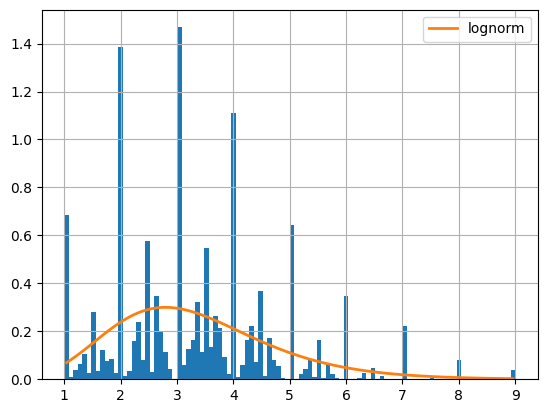

In [64]:
apc = undiscounted_quantity_rslt.groupby('Product ID')['Quantity'].mean()

f = Fitter(apc,
           distributions=['lognorm',
                          ])
f.fit()
f.summary()


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,1.633572,1078.194814,-54203.853877,inf,0.293469,0.000000e+00
gamma,1.791277,1404.450298,-53601.311952,inf,0.229275,1.367235e-302


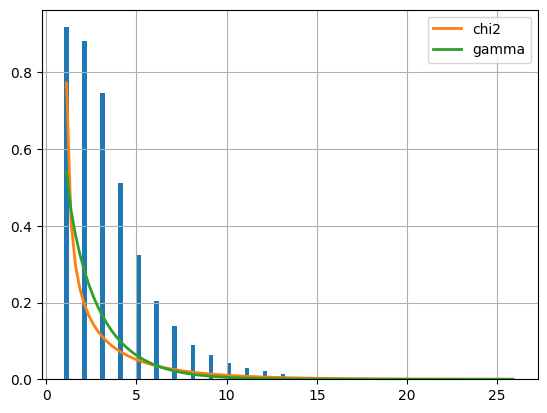

In [49]:
apc = undiscounted_df.groupby('Product ID')['Quantity'].count()

f = Fitter(apc,
           distributions=['gamma',
                          'chi2'])
f.fit()
f.summary()


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,3.780319,1254.202811,-62558.122857,inf,0.496998,0.0
chi2,4.821383,1102.452919,-60574.886664,inf,0.352999,0.0


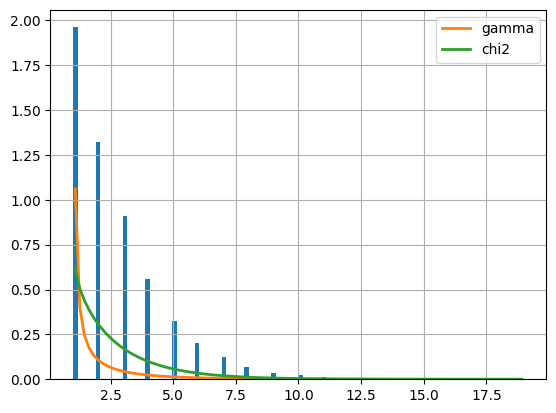

In [48]:
apc = discounted_df.groupby('Product ID')['Quantity'].count()

f = Fitter(apc,
           distributions=['gamma',
                          'chi2'])
f.fit()
f.summary()


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,1.530871,903.92224,-54628.380045,inf,0.06957,5.841937e-28


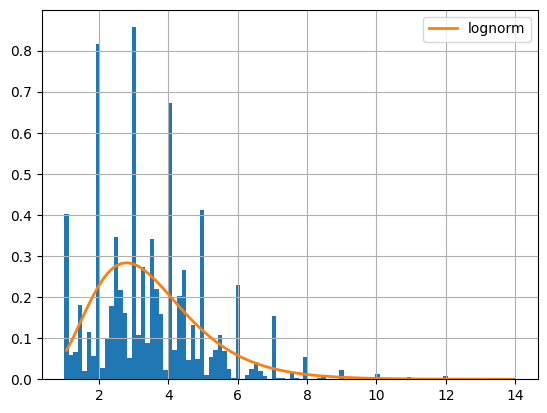

In [66]:
apc = undiscounted_df.groupby('Product ID')['Quantity'].mean()

f = Fitter(apc,
           distributions=['lognorm'
                          ])
f.fit()
f.summary()


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,2.396176,839.130531,-66275.354010,inf,0.080514,2.025604e-46
chi2,2.398055,842.405203,-66268.964261,inf,0.090134,4.366562e-58


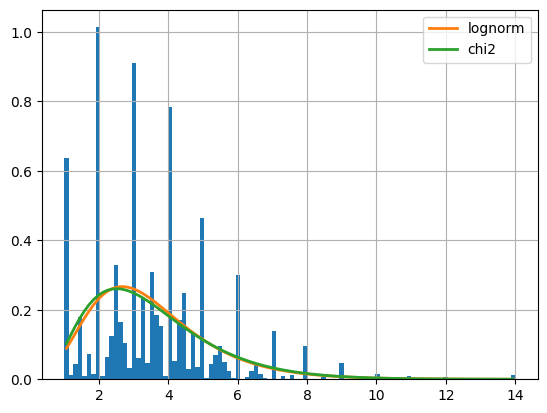

In [68]:
apc = discounted_df.groupby('Product ID')['Quantity'].mean()

f = Fitter(apc,
           distributions=['lognorm',
                          'chi2'])
f.fit()
f.summary()


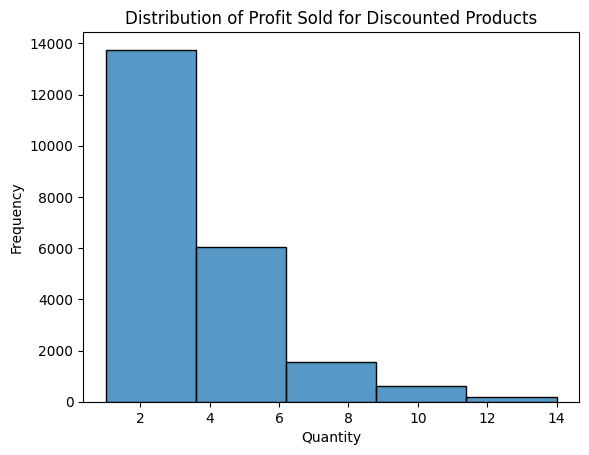

In [36]:
import seaborn as sns

sns.histplot(undiscounted_df['Quantity'],bins=5)
# add labels and title to the plot
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Profit Sold for Discounted Products')

# show the plot
plt.show()

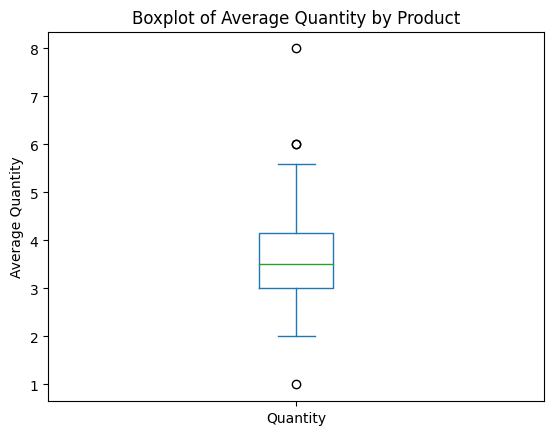

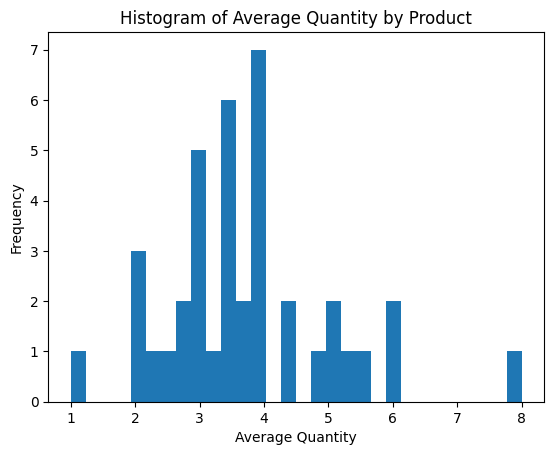

In [10]:
# group by product id and calculate the average quantity for each group
avg_quantity = discounted_df.groupby('Category')['Quantity'].mean()
avg_quantity = avg_quantity.round(decimals=1)

# create a boxplot of the average quantity by product id
avg_quantity.plot(kind='box')
plt.title('Boxplot of Average Quantity by Product')
plt.ylabel('Average Quantity')
plt.show()
# create a histogram of the average quantity by product id
avg_quantity.plot(kind='hist', bins=30)
plt.title('Histogram of Average Quantity by Product')
plt.xlabel('Average Quantity')
plt.show()

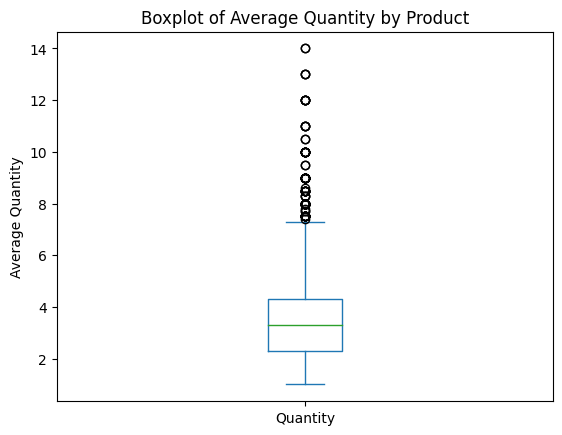

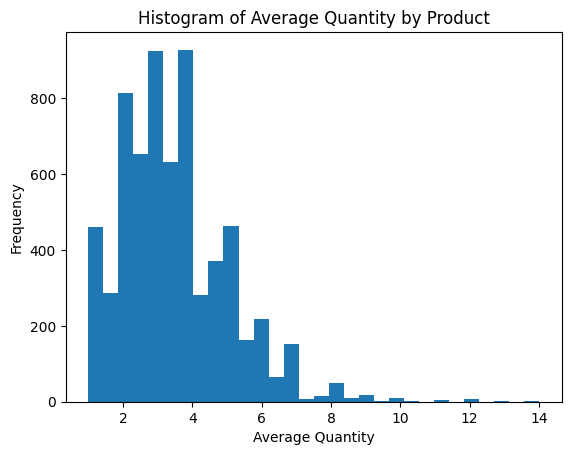

In [11]:
# group by product id and calculate the average quantity for each group
undis_avg_quantity = undiscounted_df.groupby('Product ID')['Quantity'].mean()
undis_avg_quantity = undis_avg_quantity.round(decimals=1)

# create a boxplot of the average quantity by product id
undis_avg_quantity.plot(kind='box')
plt.title('Boxplot of Average Quantity by Product')
plt.ylabel('Average Quantity')
plt.show()
# create a histogram of the average quantity by product id
undis_avg_quantity.plot(kind='hist', bins=30)
plt.title('Histogram of Average Quantity by Product')
plt.xlabel('Average Quantity')
plt.show()

In [ ]:
print(avg_quantity)

In [ ]:
discounted_df.head

array([[<AxesSubplot: title={'center': 'Quantity'}>]], dtype=object)

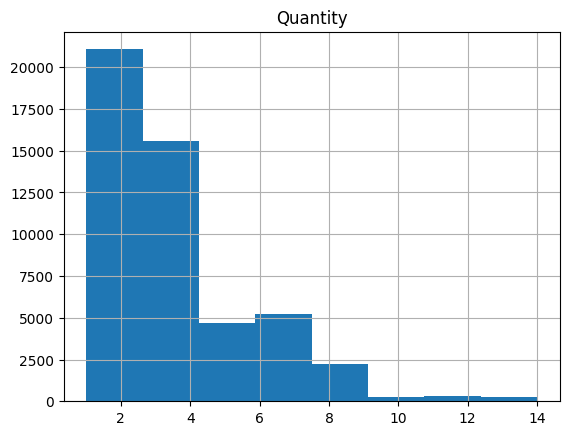

In [28]:
data.hist(column='Quantity', bins=8)

array([[<AxesSubplot: title={'center': 'Quantity'}>]], dtype=object)

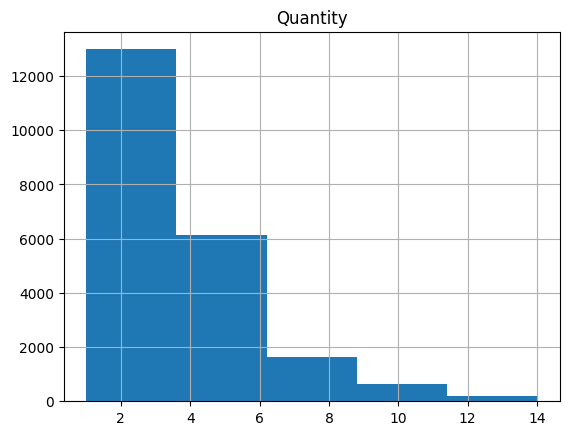

In [31]:
discounted_df.hist(column='Quantity', bins=5)

5.337179434791819e-169 There is a significant difference in sales volume between the discounted and undiscounted products.
positive_mean=  27.88792065463297
undiscounted_mean=  60.825898191983406
discounted_mean=  -13.784348264478139


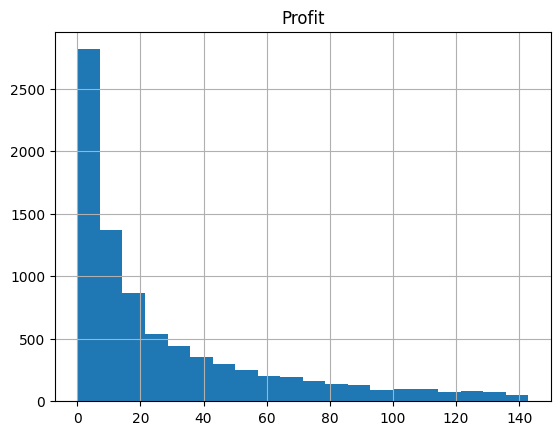

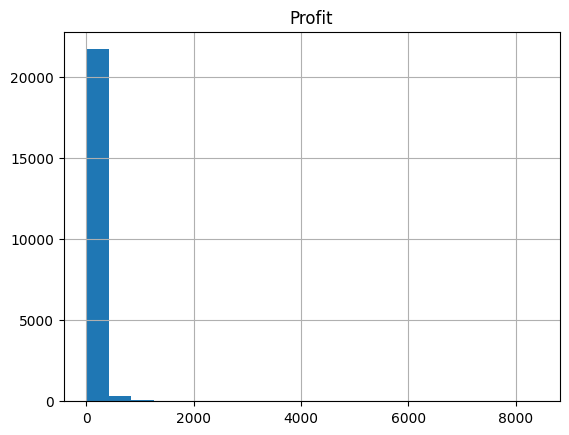

In [32]:
import pandas as pd
from scipy.stats import ttest_ind

# assume you have two dataframes named `discounted_df` and `undiscounted_df`
# with the columns `product id`, `quantity`, `discount`, `profit`, and `category`

# Calculate the total quantity sold and total profit for each dataframe
positive_totals = positive_profit_rslt.groupby('Product ID').agg({'Quantity': 'sum', 'Profit': 'sum'})
undiscounted_totals = undiscounted_df.groupby('Product ID').agg({'Quantity': 'sum', 'Profit': 'sum'})

# Calculate the mean and standard deviation of the quantity sold for each dataframe
discounted_mean = discounted_df['Profit'].mean()
positive_mean = positive_profit_rslt['Profit'].mean()
positive_std = positive_profit_rslt['Profit'].std()
undiscounted_mean = undiscounted_df['Profit'].mean()
undiscounted_std = undiscounted_df['Profit'].std()

# Compare the distributions of the quantity sold for the two dataframes
positive_profit_rslt.hist(column='Profit', bins=20)
undiscounted_df.hist(column='Profit', bins=20)

# Use a statistical test to determine whether there is a significant difference in sales volume between the two dataframes
t_stat, p_value = ttest_ind(positive_profit_rslt['Profit'], undiscounted_df['Profit'], equal_var=False)

# Interpret the results
if p_value < 0.05:
    print(p_value,'There is a significant difference in sales volume between the discounted and undiscounted products.')
else:
    print(p_value,'There is no significant difference in sales volume between the discounted and undiscounted products.')
    
print('positive_mean= ',positive_mean)
print('undiscounted_mean= ',undiscounted_mean)
print('discounted_mean= ',discounted_mean)
# Draw conclusions and report findings
# Based on the analysis, we can conclude that there is/is not a significant difference in sales volume between the discounted and undiscounted products. This indicates that the practice of discounting items may/may not be a deceptive strategy used by stores to increase sales and profit.

8.977696547566173e-15 There is a significant difference in sales volume between the discounted and undiscounted products.
discounted mean=  3.426879894329654
undiscounted mean =  3.277053694355209


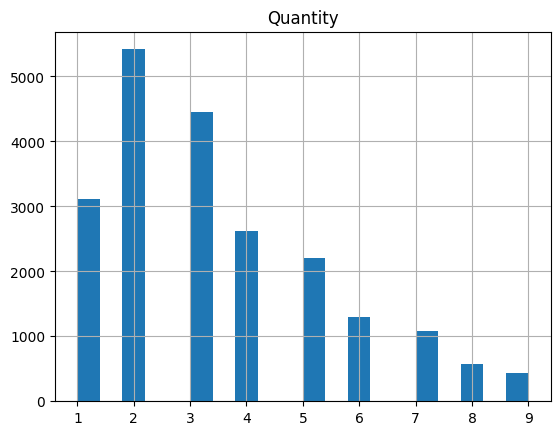

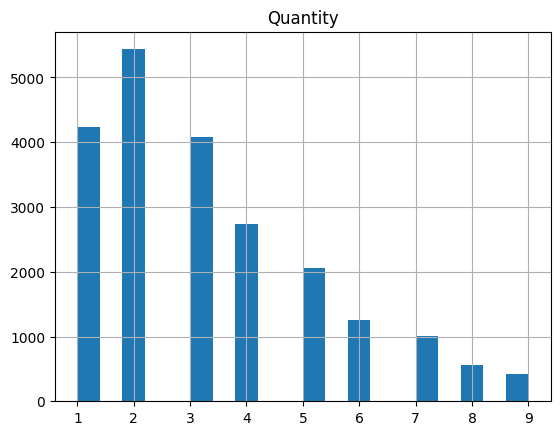

In [80]:
import pandas as pd
from scipy.stats import ttest_ind

# assume you have two dataframes named `discounted_df` and `undiscounted_df`
# with the columns `product id`, `quantity`, `discount`, `profit`, and `category`

# Calculate the total quantity sold and total profit for each dataframe
discounted_totals = discounted_quantity_rslt.groupby('Product ID').agg({'Quantity': 'sum', 'Profit': 'sum'})
undiscounted_totals = undiscounted_quantity_rslt.groupby('Product ID').agg({'Quantity': 'sum', 'Profit': 'sum'})

# Calculate the mean and standard deviation of the quantity sold for each dataframe
discounted_mean = discounted_quantity_rslt['Quantity'].mean()
discounted_std = discounted_quantity_rslt['Quantity'].std()
undiscounted_mean = undiscounted_quantity_rslt['Quantity'].mean()
undiscounted_std = undiscounted_quantity_rslt['Quantity'].std()

# Compare the distributions of the quantity sold for the two dataframes
discounted_quantity_rslt.hist(column='Quantity', bins=20)
undiscounted_quantity_rslt.hist(column='Quantity', bins=20)

# Use a statistical test to determine whether there is a significant difference in sales volume between the two dataframes
t_stat, p_value = ttest_ind(discounted_quantity_rslt['Quantity'], undiscounted_quantity_rslt['Quantity'], equal_var=False)

# Interpret the results
if p_value < 0.05:
    print(p_value,'There is a significant difference in sales volume between the discounted and undiscounted products.')
else:
    print(p_value,'There is no significant difference in sales volume between the discounted and undiscounted products.')
    
print('discounted mean= ', discounted_mean)
print('undiscounted mean = ', undiscounted_mean)
# Draw conclusions and report findings
# Based on the analysis, we can conclude that there is/is not a significant difference in sales volume between the discounted and undiscounted products. This indicates that the practice of discounting items may/may not be a deceptive strategy used by stores to increase sales and profit.

0.01781903535978802 There is a significant difference in sales volume between the discounted and undiscounted products.


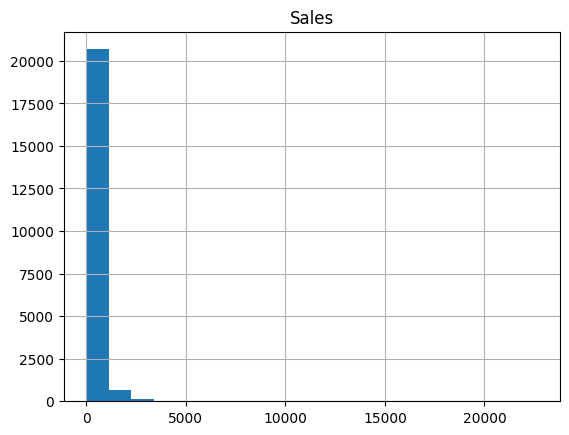

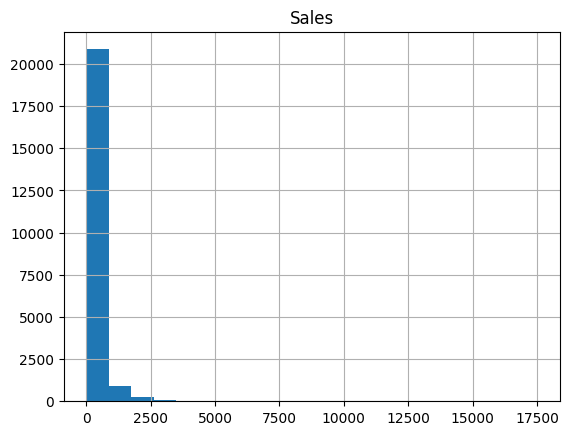

In [77]:
from scipy.stats import ttest_ind

# Calculate the total quantity sold and total profit for each dataframe
discounted_totals = discounted_df.groupby('Product ID').agg({'Sales': 'sum'})
undiscounted_totals = undiscounted_df.groupby('Product ID').agg({'Sales': 'sum'})

# Calculate the mean and standard deviation of the quantity sold for each dataframe
discounted_mean = discounted_df['Sales'].mean()
discounted_std = discounted_df['Sales'].std()
undiscounted_mean = undiscounted_df['Sales'].mean()
undiscounted_std = undiscounted_df['Sales'].std()

# Compare the distributions of the quantity sold for the two dataframes
discounted_df.hist(column='Sales', bins=20)
undiscounted_df.hist(column='Sales', bins=20)

# Use a statistical test to determine whether there is a significant difference in sales volume between the two dataframes
t_stat, p_value = ttest_ind(discounted_df['Sales'], undiscounted_df['Sales'], equal_var=False)

# Interpret the results
if p_value < 0.05:
    print(p_value,'There is a significant difference in sales volume between the discounted and undiscounted products.')
else:
    print(p_value,'There is no significant difference in sales volume between the discounted and undiscounted products.')


0.0 There is a significant difference in sales volume between the discounted and undiscounted products.
discounted profit=  -4.340057999649061
undiscounted profit=  24.87579492546457


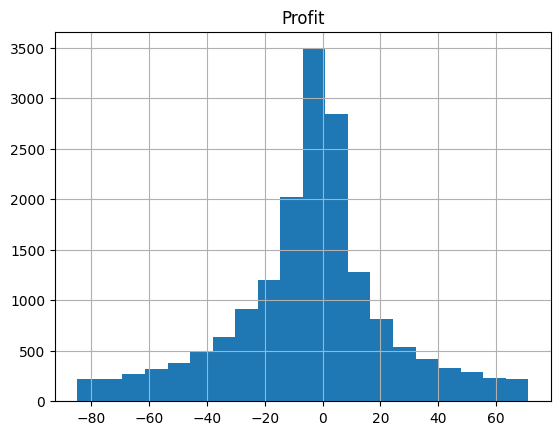

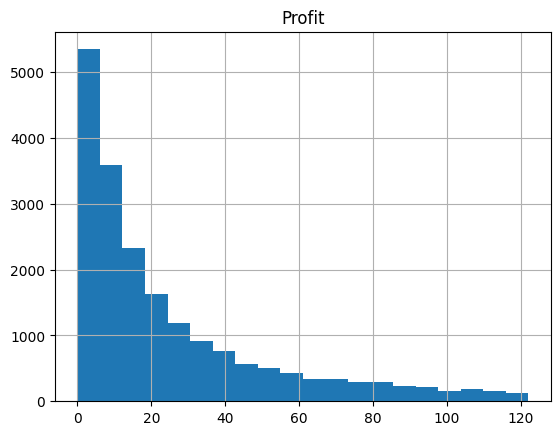

In [85]:
from scipy.stats import ttest_ind

# Calculate the total quantity sold and total profit for each dataframe
discounted_totals = discounted_profit_rslt.groupby('Product ID').agg({'Quantity': 'sum', 'Profit': 'sum'})
undiscounted_totals = undiscounted_profit_rslt.groupby('Product ID').agg({'Quantity': 'sum', 'Profit': 'sum'})

# Calculate the mean and standard deviation of the quantity sold for each dataframe
discounted_mean = discounted_profit_rslt['Profit'].mean()
discounted_std = discounted_profit_rslt['Profit'].std()
undiscounted_mean = undiscounted_profit_rslt['Profit'].mean()
undiscounted_std = undiscounted_profit_rslt['Profit'].std()

# Compare the distributions of the quantity sold for the two dataframes
discounted_profit_rslt.hist(column='Profit', bins=20)
undiscounted_profit_rslt.hist(column='Profit', bins=20)

# Use a statistical test to determine whether there is a significant difference in sales volume between the two dataframes
t_stat, p_value = ttest_ind(discounted_df['Profit'], undiscounted_df['Profit'], equal_var=False)

# Interpret the results
if p_value < 0.05:
    print(p_value,'There is a significant difference in sales volume between the discounted and undiscounted products.')
else:
    print(p_value,'There is no significant difference in sales volume between the discounted and undiscounted products.')

print('discounted profit= ', discounted_mean)
print('undiscounted profit= ', undiscounted_mean)

In [38]:
from scipy.stats import mannwhitneyu

# perform a Mann-Whitney U test on the `quantity` column of the `discounted_df` and `undiscounted_df` dataframes
u_statistic, p_value = mannwhitneyu(discounted_quantity_rslt['Quantity'], undiscounted_quantity_rslt['Quantity'])

# print the p-value
print('P-value for Mann-Whitney U test:', p_value)
print('u-statistic= ', u_statistic)

P-value for Mann-Whitney U test: 2.259326604426566e-21
u-statistic=  242964669.0


In [39]:
from scipy.stats import mannwhitneyu

# perform a Mann-Whitney U test on the `quantity` column of the `discounted_df` and `undiscounted_df` dataframes
u_statistic, p_value = mannwhitneyu(discounted_profit_rslt['Profit'], undiscounted_profit_rslt['Profit'])

# print the p-value
print('P-value for Mann-Whitney U test:', p_value)
print('u-statistic= ', u_statistic)

P-value for Mann-Whitney U test: 0.0
u-statistic=  63337708.5


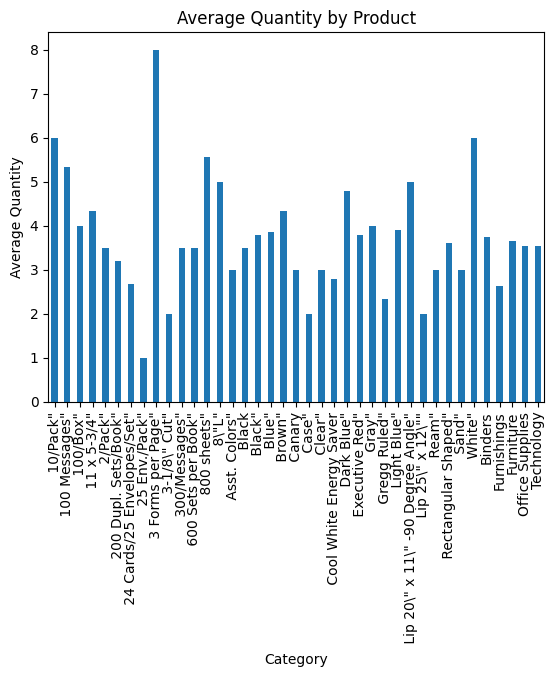

In [14]:
# group by product id and calculate the average quantity for each group
avg_quantity = discounted_df.groupby('Category')['Quantity'].mean()
undis_avg_quantity = undiscounted_df.groupby('Category')['Quantity'].mean()
# round up the average quantity values to 2 decimal places
avg_quantity = avg_quantity.round(decimals=2)
undis_avg_quantity = avg_quantity.round(decimals=2)
# create a bar plot of the average quantity by product id
avg_quantity.plot(kind='bar')
undis_avg_quantity.plot(kind='bar')
plt.title('Average Quantity by Product')
plt.xlabel('Category')
plt.ylabel('Average Quantity')
plt.show()


In [16]:
# group by product id and calculate the average quantity for each group
avg_quantity = discounted_df.groupby(['Category'])['Quantity'].mean()
avg_quantity = pd.DataFrame(avg_quantity).reset_index()
avg_profit = discounted_df.groupby(['Category'])['Profit'].mean()
avg_profit = pd.DataFrame(avg_profit).reset_index()

undis_avg_quantity = undiscounted_df.groupby(['Category'])['Quantity'].mean()
undis_avg_quantity = pd.DataFrame(undis_avg_quantity).reset_index()
undis_avg_profit =  undiscounted_df.groupby(['Category'])['Profit'].mean()
undis_avg_profit = pd.DataFrame(undis_avg_profit).reset_index()


profit_merged_df = pd.merge(undis_avg_profit, avg_profit, on='Category')
quantity_merged_df = pd.merge(undis_avg_quantity, avg_quantity, on='Category')

# create a grouped bar chart of the merged data
#print(quantity_merged_df)

In [17]:
quantity_merged_df.head

<bound method NDFrame.head of                               Category  Quantity_x  Quantity_y
0                             10/Pack"    1.500000    6.000000
1                        100 Messages"    4.200000    5.333333
2                             100/Box"    3.000000    4.000000
3                          11 x 5-3/4"    2.000000    4.333333
4                              2/Pack"    3.500000    3.500000
5                 200 Dupl. Sets/Book"    2.000000    3.200000
6           24 Cards/25 Envelopes/Set"    2.000000    2.666667
7                        25 Env./Pack"    6.000000    1.000000
8                    3 Forms per Page"    4.500000    8.000000
9                         3-1/8\" Cut"    2.500000    2.000000
10                       300/Messages"    2.125000    3.500000
11                  600 Sets per Book"    3.000000    3.500000
12                         800 sheets"    3.000000    5.571429
13                               8\"L"    5.250000    5.000000
14                       

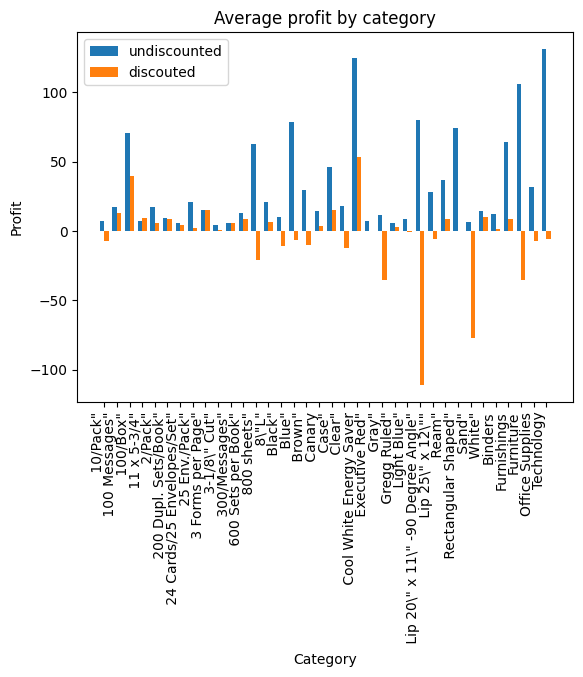

In [16]:
# create a grouped bar chart of the merged data
fig, ax = plt.subplots()
bar_width = 0.35
x = range(len(profit_merged_df))
ax.bar(x, profit_merged_df['Profit_x'], width=bar_width, label='undiscounted')
ax.bar([i + bar_width for i in x], profit_merged_df['Profit_y'], width=bar_width, label='discouted')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(profit_merged_df['Category'], rotation=90, ha='right')
ax.set_title('Average profit by category')
ax.set_xlabel('Category')
ax.set_ylabel('Profit')
ax.legend()
plt.show()

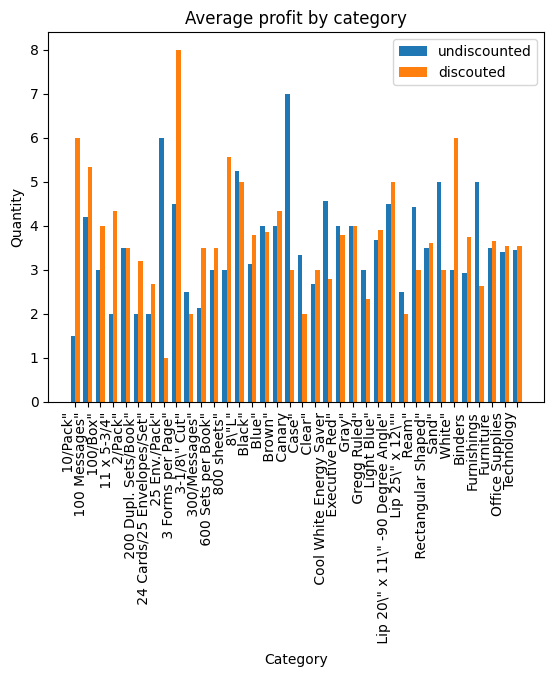

In [75]:
# create a grouped bar chart of the merged data
fig, ax = plt.subplots()
bar_width = 0.35
x = range(len(quantity_merged_df))
ax.bar(x, quantity_merged_df['Quantity_x'], width=bar_width, label='undiscounted')
ax.bar([i + bar_width for i in x], quantity_merged_df['Quantity_y'], width=bar_width, label='discouted')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(quantity_merged_df['Category'], rotation=90, ha='right')
ax.set_title('Average profit by category')
ax.set_xlabel('Category')
ax.set_ylabel('Quantity')
ax.legend()
plt.show()


In [ ]:
profit_merged_df.to_csv('category profit table.csv', index=False)
quantity_merged_df.to_csv('category quantity table.csv', index=False)

In [18]:
# perform a left-anti join to identify the rows that are in `discounted_df` but not in `undiscounted_df`
p_left_anti_df = avg_profit.merge(undis_avg_profit, on='Category', how='left', indicator=True)
p_left_anti_df = p_left_anti_df.loc[p_left_anti_df['_merge'] == 'left_only']
p_left_anti_df['Profit_y'].fillna(0, inplace=True)

# print the resulting left-anti join dataframe
print(p_left_anti_df)

          Category   Profit_x  Profit_y     _merge
14   Asst. Colors"  -1.297000       0.0  left_only
15           Black  15.640733       0.0  left_only
23      Dark Blue"   2.636520       0.0  left_only


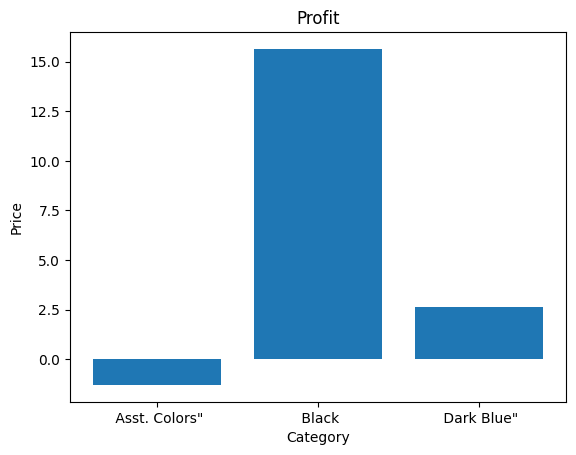

In [19]:
fig, ax = plt.subplots()
ax.bar(p_left_anti_df['Category'], p_left_anti_df['Profit_x'])
ax.set_xlabel('Category')
ax.set_ylabel('Price')
ax.set_title('Profit')
plt.show()

In [20]:
# perform a left-anti join to identify the rows that are in `discounted_df` but not in `undiscounted_df`
q_left_anti_df = avg_quantity.merge(undis_avg_quantity, on='Category', how='left', indicator=True)
q_left_anti_df = q_left_anti_df.loc[q_left_anti_df['_merge'] == 'left_only']
q_left_anti_df['Quantity_y'].fillna(0, inplace=True)

# print the resulting left-anti join dataframe
print(q_left_anti_df)

          Category  Quantity_x  Quantity_y     _merge
14   Asst. Colors"         3.0         0.0  left_only
15           Black         3.5         0.0  left_only
23      Dark Blue"         4.8         0.0  left_only


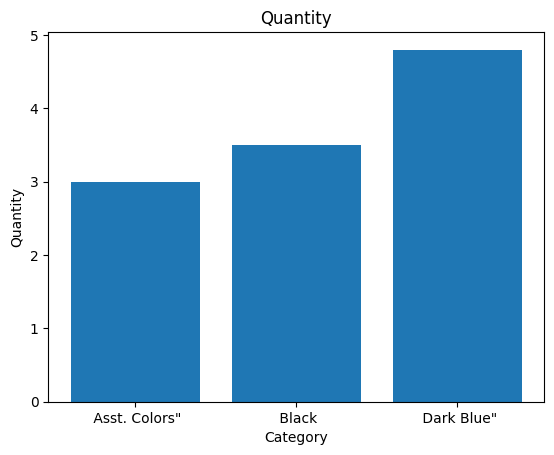

In [21]:
fig, ax = plt.subplots()
ax.bar(q_left_anti_df['Category'], q_left_anti_df['Quantity_x'])
ax.set_xlabel('Category')
ax.set_ylabel('Quantity')
ax.set_title('Quantity')
plt.show()

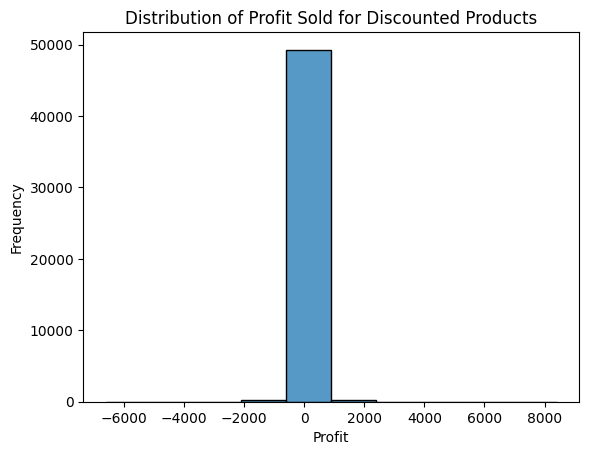

In [11]:
import seaborn as sns

sns.histplot(data['Profit'],bins=10)
# add labels and title to the plot
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit Sold for Discounted Products')

# show the plot
plt.show()

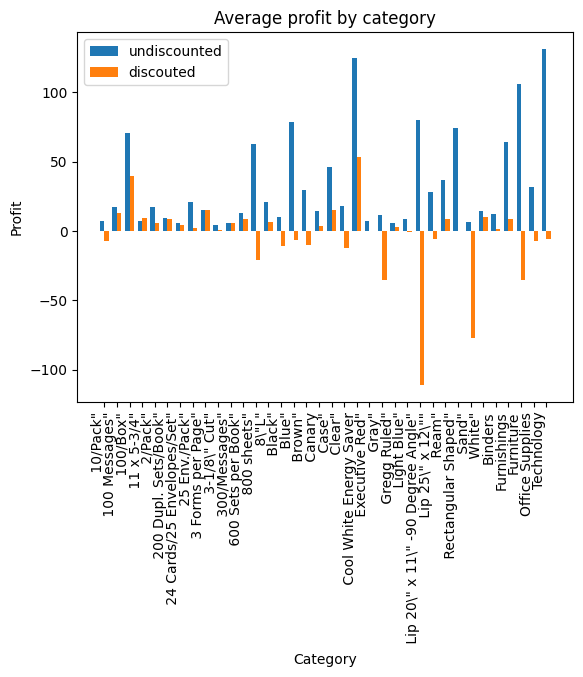

In [41]:
# create a grouped bar chart of the merged data
test_avg_profit =  positive_profit_rslt.groupby(['Category'])['Profit'].mean()
test_avg_profit = pd.DataFrame(test_avg_profit).reset_index()

test_merged_df = pd.merge(undis_avg_profit, test_avg_profit, on='Category')
fig, ax = plt.subplots()
bar_width = 0.35
x = range(len(profit_merged_df))
ax.bar(x, profit_merged_df['Profit_x'], width=bar_width, label='undiscounted')
ax.bar([i + bar_width for i in x], profit_merged_df['Profit_y'], width=bar_width, label='discouted')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(profit_merged_df['Category'], rotation=90, ha='right')
ax.set_title('Average profit by category')
ax.set_xlabel('Category')
ax.set_ylabel('Profit')
ax.legend()
plt.show()

In [27]:
from scipy.stats import kruskal

# Extract the 'profit' column from each dataframe
profit1 = discounted_df['Quantity']
profit2 = undiscounted_df['Quantity']

# Perform the Kruskal-Wallis test
statistic, pvalue = kruskal(profit1, profit2)

# Print the result
print('Kruskal-Wallis test:')
print('Statistic =', statistic)
print('p-value =', pvalue)

Kruskal-Wallis test:
Statistic = 83.91266652747474
p-value = 5.171214551472549e-20


In [18]:
from scipy.stats import spearmanr
profit1 = quantity_merged_df['Quantity_x']
profit2 = quantity_merged_df['Quantity_y']

corr, pval = spearmanr(profit1, profit2)
print("Spearman's rank correlation coefficient: ", corr)
print("p-value: ", pval)

Spearman's rank correlation coefficient:  0.019509054348528496
p-value:  0.9100829801476659


In [20]:
len(discounted_df.groupby(['Product ID'])['Quantity'].mean())

8153

In [26]:
from scipy.stats import wilcoxon

# Extract the 'profit' column from each dataframe
profit1 = discounted_df['Quantity']
profit2 = undiscounted_df['Quantity']

# Ensure that the two samples have the same size
min_size = min(len(profit1), len(profit2))
profit1 = profit1.sample(min_size, random_state=1)
profit2 = profit2.sample(min_size, random_state=1)

# Perform the Wilcoxon signed-rank test
statistic, pvalue = wilcoxon(profit1, profit2)

# Print the results
print('Wilcoxon signed-rank test:')
print('Statistic =', statistic)
print('p-value =', pvalue)

Wilcoxon signed-rank test:
Statistic = 77682407.5
p-value = 1.743769780949555e-12


In [49]:
from scipy.stats import mannwhitneyu
# perform a Mann-Whitney U test on the `quantity` column of the `discounted_df` and `undiscounted_df` dataframes
mannwhitneyu(discounted_df['Sales'], undiscounted_df['Sales'], alternative='greater')

MannwhitneyuResult(statistic=234828775.5, pvalue=0.9994907997832346)